In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("wine_data.csv", header=None, usecols=[0, 1, 2], names=["Class", "Alcohol", "Malic acid"])

In [18]:
df

,Class,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


C:\Users\nikhi\AppData\Local\Temp\ipykernel_13800\3208995520.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Alcohol"], shade=True)


<Axes: xlabel='Alcohol', ylabel='Density'>

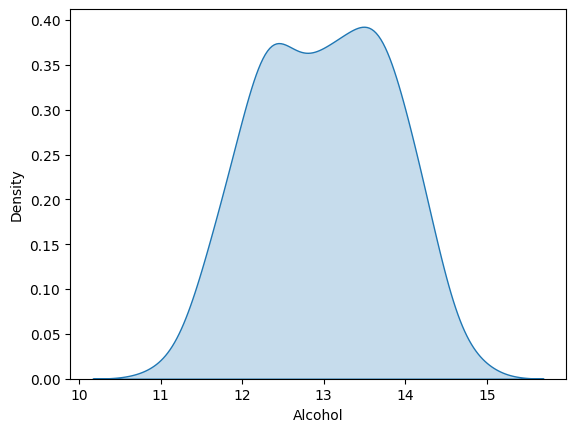

In [19]:
sns.kdeplot(df["Alcohol"], shade=True)

C:\Users\nikhi\AppData\Local\Temp\ipykernel_13800\145947520.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Malic acid"], shade=True)


<Axes: xlabel='Malic acid', ylabel='Density'>

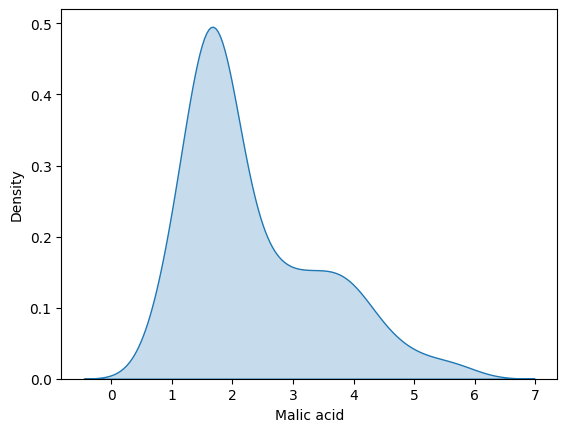

In [20]:
sns.kdeplot(df["Malic acid"], shade=True)

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

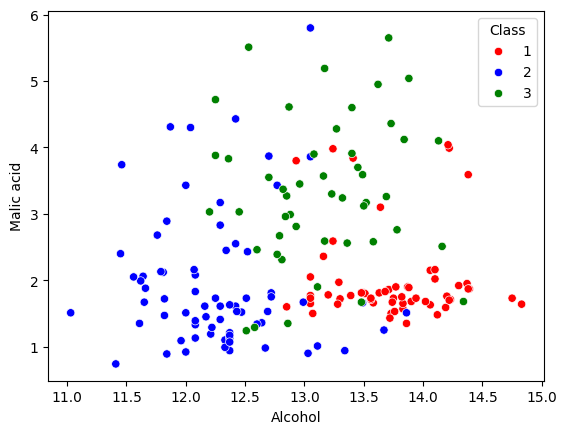

In [22]:
color_dict = {1: "red", 2: "blue", 3: "green"}
sns.scatterplot(x="Alcohol", y="Malic acid", hue=df["Class"], palette=color_dict, data=df)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop("Class", axis=1), df["Class"], test_size=0.2, random_state=0)

X_train.shape, X_test.shape

((142, 2), (36, 2))

In [25]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()

#fit the scalar on the training data
scalar.fit(X_train)

#transform the training data
X_train_scaled = scalar.transform(X_train)
#transform the test data
X_test_scaled = scalar.transform(X_test)


In [26]:
#Convert the numpy arrays back to dataframes
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
np.round(X_train.describe(), 1)

,Alcohol,Malic acid
count,142.0,142.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.7
25%,12.3,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [29]:
np.round(X_train_scaled.describe(), 2)

,Alcohol,Malic acid
count,142.00,142.00
mean,0.53,0.33
std,0.22,0.23
min,0.00,0.00
25%,0.35,0.18
50%,0.54,0.24
75%,0.70,0.51
max,1.00,1.00


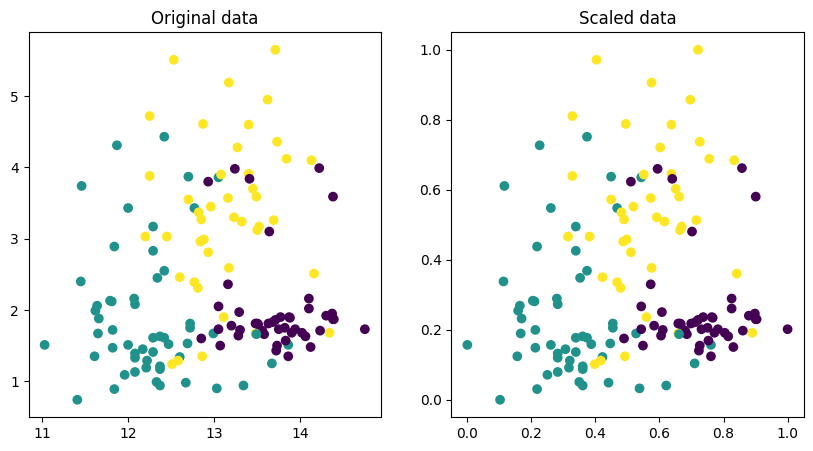

In [30]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

ax1.scatter(X_train["Alcohol"], X_train["Malic acid"], c=y_train)
ax1.set_title("Original data")
ax2.scatter(X_train_scaled["Alcohol"], X_train_scaled["Malic acid"], c=y_train)
ax2.set_title("Scaled data")

plt.show()